In [113]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from datetime import datetime
now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
import os
if not os.path.isdir('C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models'): os.mkdir('C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models')

def fetch_batch(epoch, n_batches, batch_index, batch_size, x_train, y_train):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(x_train.shape[0], size=batch_size)
    X_batch = x_train[indices]
    y_batch = y_train.reshape(-1, 1)[indices]
    return X_batch, y_batch

N = 1000
X_data, y_data = make_moons(N, noise=0.1, random_state=42)

# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, random_state=23, test_size=0.2)

X = tf.placeholder(tf.float32, shape=(None, x_train.shape[1]), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
prediction = tf.placeholder(tf.float32, shape=(None, 1), name="prediction")

n_epochs = 20
# f)
batch_size = 50
learning_rate = 0.1
n_batches = int(np.ceil(x_train.shape[0] / batch_size))

a = tf.Variable(tf.random_uniform([7, 1], -1.0, 1.0, seed=42), name="a")
aX = a[0, 0] + tf.math.scalar_mul(a[1, 0], tf.slice(X, [0, 0], [-1, 1])) + tf.math.scalar_mul(a[2, 0], tf.slice(X, [0, 1], [-1, 1])) + tf.math.scalar_mul(a[3, 0], tf.slice(X, [0, 0], [-1, 1])**2) + tf.math.scalar_mul(a[4, 0], tf.slice(X, [0, 1], [-1, 1])**2) + tf.math.scalar_mul(a[5, 0], tf.slice(X, [0, 0], [-1, 1])**3) + tf.math.scalar_mul(a[6, 0], tf.slice(X, [0, 1], [-1, 1])**3)
# a)
sigmoid = tf.sigmoid(aX, name='sigmoid')
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
with tf.name_scope("loss") as scope:
    error = sigmoid - y
    mse = tf.reduce_mean(tf.square(error), name="mse")
mse_summary = tf.summary.scalar('MSE', mse)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
loss_ = tf.compat.v1.losses.log_loss(y_train.reshape(-1, 1), prediction, scope=None)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    if not os.path.isfile('C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models/my_model.ckpt'):
        sess.run(init)
    else:
        # c)
        saver.restore(sess, "C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models/my_model.ckpt")

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, n_batches, batch_index, batch_size, x_train, y_train)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                # d)
                file_writer.add_summary(summary_str, step)
                # b)
                save_path = saver.save(sess, "C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models/my_model.ckpt")
                pred = sigmoid.eval(feed_dict={X: x_train})
                loss_val = loss_.eval(feed_dict={prediction: pred})
                # e)
                print('epoch:', epoch, 'batch_index:', batch_index, ' loss:', loss_val)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
    # b)
    save_path = saver.save(sess, "C:/Anabel/inatel 2020/TP555- IA and ML/10ma aula/my_models/my_model_final.ckpt")
    
    y_pred = sigmoid.eval(feed_dict={X: x_test})
    
file_writer.close()

epoch: 0 batch_index: 0  loss: 0.845338
epoch: 0 batch_index: 10  loss: 0.75969213
epoch: 1 batch_index: 0  loss: 0.7084234
epoch: 1 batch_index: 10  loss: 0.63379157
epoch: 2 batch_index: 0  loss: 0.59923273
epoch: 2 batch_index: 10  loss: 0.5515221
epoch: 3 batch_index: 0  loss: 0.5279217
epoch: 3 batch_index: 10  loss: 0.4944954
epoch: 4 batch_index: 0  loss: 0.47632772
epoch: 4 batch_index: 10  loss: 0.45053777
epoch: 5 batch_index: 0  loss: 0.43921685
epoch: 5 batch_index: 10  loss: 0.4238022
epoch: 6 batch_index: 0  loss: 0.41692978
epoch: 6 batch_index: 10  loss: 0.40670532
epoch: 7 batch_index: 0  loss: 0.4019733
epoch: 7 batch_index: 10  loss: 0.39304832
epoch: 8 batch_index: 0  loss: 0.38796902
epoch: 8 batch_index: 10  loss: 0.38054368
epoch: 9 batch_index: 0  loss: 0.37656134
epoch: 9 batch_index: 10  loss: 0.37102586
epoch: 10 batch_index: 0  loss: 0.36751312
epoch: 10 batch_index: 10  loss: 0.36307457
epoch: 11 batch_index: 0  loss: 0.36017877
epoch: 11 batch_index: 10  l

In [114]:
# g)
from sklearn.metrics import precision_score
print('Precision Score: ', precision_score(y_test.reshape(-1, 1), np.around(y_pred)))

Precision Score:  0.8558558558558559


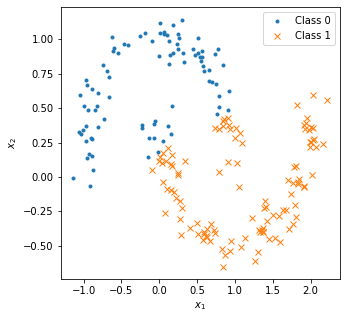

In [115]:
# h)
import matplotlib.pyplot as plt
idx0 = np.argwhere(np.around(y_pred) == 0)
idx1 = np.argwhere(np.around(y_pred) == 1)
fig = plt.figure(figsize=(5,5))
plt.plot(x_test[idx0[:,0],0], x_test[idx0[:,0],1], '.', label='Class 0')
plt.plot(x_test[idx1[:,0],0], x_test[idx1[:,0],1], 'x', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_classes', dpi=600)
plt.show()